# Capítulo 2 - O que podemos fazer com o Biopython

Este capítulo é designado para nos iniciar ao Biopython e nos das um panorama de quais ferramentas estão acessíveis e como usá-las. Todos os exemplos deste capítulo partem do pressuposto que você já possua um conhecimento geral de Python, e claro, já tenha instalado o Biopython (para saber como instalar veja: https://github.com/GTL98/biopython_br#instalando-o-biopython). Se você sente que precisa melhorar um pouco mais no Python, acesse o site oficial para ver as documentações e retirar suas dúvidas (https://docs.python.org/3/).

Como a maior parte dos dados biológicos envolvem a procura em banco de dados online, a maior parte dos exemplos requer que haja uma conexão estável com a internet.

Com essa pequena explicação do que precisaremos, vamos ver o que podemos fazer com o Biopython.

## 2.1 Visão geral do que o Biopython oferece

Como mencionado na introdução, o Biopython é um conjunto de bibliotecas que fornece a habilidade de lidar com "coisas" interessantes parq biologistas que trabalham com computação. De modo geral, isso indica que você deve ter alguma experiência em programação (Python, é claro!) ou um interesse por aprender programação. A tarefa do Biopython é deixar mais fácil o seu trabalho como programador, fornecendo bibliotecas retulizáveis para que você possa focar em responder perguntas de interesse específico, não precisando gastar horas nas análises internas de um tipo de formato específico de arquivo. Claro, se você quiser contribuir com algum analisador ou ferramenta que ainda não exista no Biopython, acesse: https://biopython.org/wiki/Contributing. Em outras palavras, a tarefa do Biopython é fazer você feliz!

Mais uma coisa sobre o Biopython é que ele fornece várias maneiras para "fazer a mesma coisa". O tutorial te ajudará a mostrar a maneira mais comum ou a mais fácil de fazer as coisas para que elas funcionem. Para aprender mais sobre as possibilidades alternativas, veja o Capítulo 20 (***link do capítulo 20***) onde há boas dicas e truques e o Capítulo 22 (***link do capítulo 22***) para algo mais avançado na construção de "docstrings" ou o próprio código.

## 2.2 Trabalhando com sequências

Indiscutivelmente, e com toda razão, o objeto central de trabalaho da bioinformática são as sequências. Por conta disso, nós vamos começar com uma rápida introdução das mecânicas do Biopython lidando com sequências, o objeto **Seq**, cujo será discutido com maiores detalhes no Capítulo 3 (https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia).

Na maioria das vezes quando pensamod em sequências, nossa mente tende a visualizar uma sequências de letras como '**AGTACACTGGT**'. Você pode criar esse objeto **Seq** com uma sequência de interesse da seguinte maneira:

In [1]:
from Bio.Seq import Seq
minha_sequencia = Seq('AGTACACTGGT')
minha_sequencia

Seq('AGTACACTGGT')

In [2]:
print(minha_sequencia)

AGTACACTGGT


O objeto **Seq** difere de uma string Python nos métodos que ela suporta. Você não consegue fazer as mesmas coisas em um objeto **Seq** em uma string Python:

In [3]:
minha_sequencia

Seq('AGTACACTGGT')

In [4]:
minha_sequencia.complement()

Seq('TCATGTGACCA')

In [5]:
minha_sequencia.reverse_complement()

Seq('ACCAGTGTACT')

A próxima classe importante é a **SeqRecord** ou Sequence Record. Essa classe permite conter uma sequência (como um objeto **Seq**) e adicionar informações de idetificação, nome e descrição da sequência. O módulo `Bio.SeqIO` serve para leitura e escrita de arquivos de sequência que trbalham com a classe **SeqRecord**, que será introduzida e analisada com mais detalhes no Capítulo 5 (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output).

Isso foi uma passagem rápida pelos recusos básicos e usos das classes de sequência do Biopython. Agora que você possui alguma ideia sobre como é interagir com os módulos do Biopython, é hora da brincadeira de trabalhar com os formatos de arquivos biológicos!

## 2.3 Um exemplo de uso

Antes de mergulharmos de cabeça nos analisadores e tudo mais qe podemos fazer com o Biopython, vamos configurar um exemplo incical para nos motivar e fazer a nossa vida ficar um pouco mais interessante. Afinal, se não existir nada de biologia nesse tutorial, por qual motivo você o leria?

Para esse exemplo, vamos usar os dados das orquídeas Sapatinhos-de-Vênus. Pesquisando um pouco mais sobre essas plantas, descobrimos que elas são da Família *Orchidaceae* e da Subfamília *Cypripedioideae*, possuindo 5 gêneros: *Cypripedium*, *Paphiopedilum*, *Phragmipedium*, *Selenipedium* e *Mexipedium*.

Essas informações são um ótimo ponto de partida para obtermos mais dados sobre essas plantas. Agora vejamos com o que o Biopython pode nos ajudar. Começaremos com a análise da sequência na seção seguinte (veremos novamente essas orquídeas nos Capítulos 6, 9 e 10).

## 2.4 Analisando formatos de arquivos de sequência

A maior parte do trabalho em bioinformática envolve lidar com diferentes formatos de arquivos feitos para armazenar os dados biológicos. Esses arquivos são carregados com dados biológicos interessantes, e um desafio especial é analisar esses arquivos em m formato que possamos manipulá-los com algum tipo de linguagem de programação. Entretanto, a tarefa de analisar esses arquivos pode ser frustrante devido ao fato de que os formatos de arquivo podem mudar com uma certa regularidade, e esses novos formatos podem conter pequenas sutilizas que possam vir a quebrar até os melhores analisadores.

Agora nós vamos fazer uma breve introdução ao módulo `Bio.SeqIO`. Começaremos com uma pesquisa online das orquídeas Sapatinhos-de-Vênus. Para deixar mais didática essa introdução, deixarei o link do NCBI já com o banco de dados de nucleotídeos referente a tudo que seja relacionado com o texto *Cypripedioideae* (https://www.ncbi.nlm.nih.gov/nuccore/?term=Cypripedioideae).

Para fins didáticos, usaremos os arquivos presentes no diretório do Biopython (https://github.com/biopython/biopython) na pasta Doc/examples. Serão usados dois arquivos, um em formato FASTA (ls_orchid.fasta) e outro em formato GenBank (ls_orchid.gbk). Para facilitar, deixarei na pasta desse arquivo os dois arquivos com os dados biológicos.

Caso você queira os dados mais atualizados, basta ir no link acima do NCBI, clicar na opção `Send to:`, selecionar as opções `Complete Record`, `File`, `FASTA`, `Default order` e clicar em `Create File`. Isso dará milhares de resultados!

### 2.4.1 Exemplo simples de análise com arquivo FASTA

Se você quiser abrir o arquivo FASTA ls_orchid.fasta em seu editor de texto preferido, verá algo semelhante a isso:

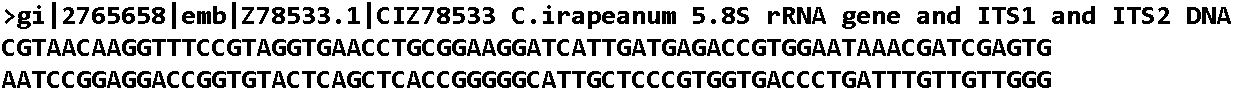...

Esse arquivo contém 94 registros, cada um separado pelo sinal de maior (>) seguido da sequência referente. Agora vamos passar isso para o Python:

In [6]:
from Bio import SeqIO
for registro_sequencia in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    print(registro_sequencia.id)
    print(repr(registro_sequencia.seq))
    print(len(registro_sequencia))
    print('\n')

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740


gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753


gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748


gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744


gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733


gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718


gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730


gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704


gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740


gi|2765648|emb|Z78523.1|CHZ78523
Seq(

### 2.4.2 Exemplo simples de análise com arquivo GenBank

Agora vamos carregar o arquivo GenBank ls_orchid.gbk. Vale notar que o cógido é igual ao usado para carregar o arquivo FASTA, a única diferença é o nome do arquivo e sua extensão:

In [7]:
from Bio import SeqIO
for registro_sequencia in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    print(registro_sequencia.id)
    print(repr(registro_sequencia.seq))
    print(len(registro_sequencia))
    print('\n')

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740


Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753


Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748


Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744


Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733


Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718


Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730


Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704


Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740


Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG')
709


Z78522.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG')
700


Z78521.1
Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC')
726


Z785

É possível notar que o valor de **registro_sequencia.id** é menor no GenBank do que no FASTA, mas ambos armazenam a mesma informação.

### 2.4.3 Eu amo analisar - por favor, não pare de falar sobre isso!

O Biopython possui uma diverisadade de analisadores e cada um possui suas peculiaridades baseadas nos formatos de arquivos em que as sequências estão armazenadas. No Capítulo 5 (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output) veremos o módulo `Bio.SeqIO` com mais detalhes, enquanto que no Capítulo 6 (https://github.com/GTL98/biopython_br/tree/main/Cap%206%20-%20Objetos%20de%20alinhamento%20de%20sequ%C3%AAncia%20m%C3%BAltipla) será introduzido o módulo `Bio.AlignIO` para as tarefas de alinhamento de sequências.

Enquanto os formatos de arquivos mais populares possuem analisadores dentro do Biopython com o `Bio.SeqIO` e/ou `Bio.AlignIO`, outros formatos de arquivos mais raros ou não tão queridos pelos cientistas podem ainda não ter analisarores ou esses analisadores serem antigos e não pertencerem ao Biopython. Se esse for o caso, veja as páginas da wiki do Biopython para retirar suas dúvidas (https://biopython.org/wiki/SeqIO e https://biopython.org/wiki/AlignIO) ou mande a sua dúvida (https://biopython.org/wiki/Mailing_lists). Essas páginas da wiki estão sempre atualizadas e possuem vários exemplos.

O próximo lugar para obter informações sobre analisadores específicos e quais as coisas legais que eles podem fazer é no Capítulo 20 (***link do capítulo 20***). Se você não encontrou alguma informação que esteja procurando, sinta-se a vontade para ajudar os desenvolvedores do Biopython com seu conhecimento!

## 2.5 Conexão com os bancos de dados biológicos

Uma das tarefas mais comuns de se fazer na bioinformática é extrair informações de bancos de dados biológicos. É um pouco entendiante acessar esses dados de forma manual, especialmente se você tiver que fazer isso repetidas vezes. Sabendo disso, o Biopython salva o seu tempo e energia realizando essas buscas a partir de scripts em Python. Atualmente, o Biopython consege extrir informações dos seguintes bancos de dados:

- Entrez e PubMed do NCBI - Ver o Capítulo 9 (***link do capítulo 9***).
- ExPASy - Ver o Capítulo 10 (***link do capítulo 10***).
- SCOP - Ver o `Bio.SCOP.search()` (https://biopython.org/docs/1.79/api/Bio.SCOP.html).

Os códigos desses módulos basicamente tornam fácil escrever o código em Python para interagir com os scripts de CGI dessas páginas web, para que seja possível obter um formato de arquivo simples e fácil de lidar. Em alguns casos, os resultados podem ser diretamente integrados com os analisadores do Biopython, deixando a tarefa de extração de informações bem mais fácil.

## 2.6 O que fazer a seguir

Agora que você chegou até aqui, espero que você possua um bom entendimento básico do Biopython e que esteja preparado para começar a usá-lo. A melhor coisa a se fazer agora é terminar de ler esse tutorial e, se quiser, bisbilhotar o código fonte dos módulos para entendê-los mais a fundo ou examinar minuciosamente a documentação.

Antes de planejar o que deseja fazer ou ver o quer os módulos do Biopython podem fazer, recomendo que dê uma olhada no Capítulo 20 (***link do capítulo 20***), onde há exemplos de códigos úteis que você possa precisar.

Se você sabe o que fazer, mas não consegue descobrir como fazer, sinta-se a vontade para postar os seus questionamentos no link https://biopython.org/wiki/Mailing_lists. Isso não ajudará somente os desenvolvedores do Biopython a responder as suas dívidas, mas também ajudará a melhorar a documentação para que a próxima pessoa consiga fazer o que deseja.

Só isso, mais nada!